In [27]:
import numpy as np
import os
import matplotlib.pyplot as plt 
from keras.utils import np_utils  

In [28]:
def load_mnist(path, kind='train'):

    labels_path = str(path+'/{}-labels.idx1-ubyte'.format(kind))
    images_path = str(path+'/{}-images.idx3-ubyte'.format(kind))

    with open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)
    
    with open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)
        
    return images, labels

In [29]:
# show the number image
def plot_image(image):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)  
    plt.imshow(image, cmap='binary')
    plt.show()  

In [30]:
# show the image and the label
def plot_images_labels_predict(images, labels, prediction, idx, num=10):  
    fig = plt.gcf()  
    fig.set_size_inches(12, 14)  
    if num > 25: num = 25  
    for i in range(0, num):  
        ax=plt.subplot(5,5, 1+i)  
        ax.imshow(images[idx], cmap='binary')  
 
        if len(prediction) > 0:  
            title = "l={},p={}".format(str(labels[idx]), str(prediction[idx]))  
        else:  
            title = "l={}".format(str(labels[idx]))  
        ax.set_title(title, fontsize=10)  
        ax.set_xticks([]); ax.set_yticks([])  
        idx+=1  
    plt.show()  

In [31]:
# read the data in the path
datapath = "D:/Program/dataset/MNIST dataset"
X_train, Y_train = load_mnist(path=datapath)
X_test, Y_test = load_mnist(path=datapath, kind="t10k")

# reshape data to number of data * pixel28*28
X_train = X_train.reshape(X_train.shape[0], 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28).astype('float32')

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


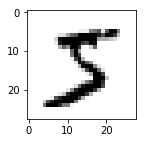

In [32]:
plot_image(X_train[0])

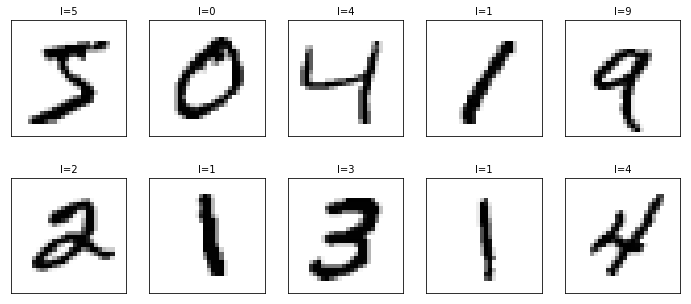

In [33]:
plot_images_labels_predict(X_train, Y_train, [], 0, 10)

In [34]:
# Data pre-processing
# Normalization  
X_train_norm = X_train.reshape(X_train.shape[0], 28, 28,1)/255
X_test_norm = X_test.reshape(X_test.shape[0], 28, 28,1)/255

# Label Onehot encoding  
Y_trainOneHot = np_utils.to_categorical(Y_train)
Y_testOneHot = np_utils.to_categorical(Y_test)

In [35]:
from keras.models import Sequential  
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D  
  
model = Sequential()  
# Create CN layer 1  
model.add(Conv2D(filters=16,  
                 kernel_size=(5,5),  
                 padding='same',
                 input_shape=(28,28,1),  
                 activation='relu'))  
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# Create CN layer 2  
model.add(Conv2D(filters=36,  
                 kernel_size=(5,5),  
                 padding='same',     
                 activation='relu'))  
  
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
  
# # Add Dropout layer
# model.add(Dropout(0.25)) 

model.add(Flatten())  

In [36]:
model.add(Dense(128, activation='relu'))  
# model.add(Dropout(0.5)) 

model.add(Dense(10, activation='softmax'))  
model.summary()  

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               225920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [37]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
  
train_history = model.fit(x=X_train_norm,  
                          y=Y_trainOneHot, validation_split=0.2,  
                          epochs=10, batch_size=300, verbose=1)  

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s - loss: 0.3879 - acc: 0.8906 - val_loss: 0.1046 - val_acc: 0.9708
Epoch 2/10
48000/48000 [==============================] - 4s - loss: 0.0859 - acc: 0.9736 - val_loss: 0.0676 - val_acc: 0.9797
Epoch 3/10
48000/48000 [==============================] - 4s - loss: 0.0578 - acc: 0.9818 - val_loss: 0.0679 - val_acc: 0.9805
Epoch 4/10
48000/48000 [==============================] - 4s - loss: 0.0469 - acc: 0.9854 - val_loss: 0.0470 - val_acc: 0.9858
Epoch 5/10
48000/48000 [==============================] - 4s - loss: 0.0372 - acc: 0.9886 - val_loss: 0.0415 - val_acc: 0.9880
Epoch 6/10
48000/48000 [==============================] - 4s - loss: 0.0297 - acc: 0.9910 - val_loss: 0.0426 - val_acc: 0.9883
Epoch 7/10
48000/48000 [==============================] - 4s - loss: 0.0247 - acc: 0.9927 - val_loss: 0.0335 - val_acc: 0.9897
Epoch 8/10
48000/48000 [==============================] - 4s 

In [38]:
model.save("MNIST.h5")

In [39]:
def show_train_history(train_history, train, validation):  
    plt.plot(train_history.history[train])  
    plt.plot(train_history.history[validation])  
    plt.title('Train History')  
    plt.ylabel(train)  
    plt.xlabel('Epoch')  
    plt.legend(['train', 'validation'], loc='upper left')  
    plt.show()  

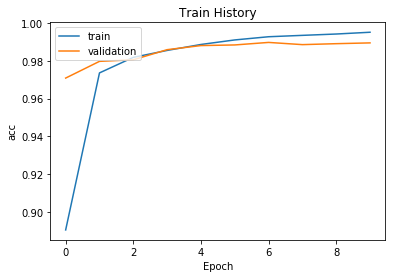

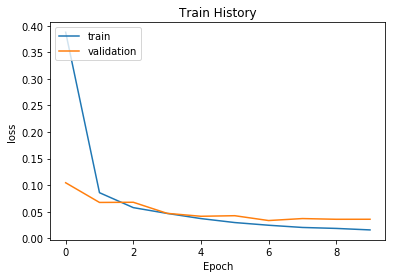

In [40]:
show_train_history(train_history, 'acc', 'val_acc')  
show_train_history(train_history, 'loss', 'val_loss') 

In [41]:
scores = model.evaluate(X_train_norm, Y_trainOneHot)  
print()
print(scores)

59968/60000 [============================>.] - ETA: 0s
[0.015435329935281576, 0.99565000000000003]


In [42]:
print("Making prediction of X_test_norm")  
prediction = model.predict_classes(X_test_norm)  # Making prediction and save result to prediction  
print()  
print("Show 10 prediction result :")  
print(prediction[:10])

Making prediction of X_test_norm
 9344/10000 [===========================>..] - ETA: 0s
Show 10 prediction result :
[7 2 1 0 4 1 4 9 5 9]


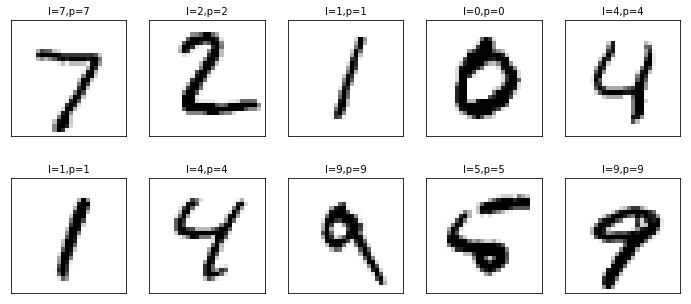

In [43]:
plot_images_labels_predict(X_test, Y_test, prediction, 0)  

In [44]:
import pandas as pd  
print("Display Confusion Matrix:")  
print(pd.crosstab(Y_test, prediction, rownames=['label'], colnames=['predict']))  

Display Confusion Matrix:
predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        973     0     0     0    0    1    3     1    2    0
1          0  1128     2     0    0    1    1     3    0    0
2          1     0  1019     0    2    0    0     5    4    1
3          0     0     1  1005    0    3    0     0    1    0
4          0     0     0     0  976    0    0     1    0    5
5          2     0     0     8    0  877    2     0    0    3
6          2     2     0     1    2    4  947     0    0    0
7          0     0     2     1    0    0    0  1024    1    0
8          3     0     1     2    0    1    0     2  960    5
9          1     2     0     0    2    2    0     4    1  997


In [45]:
train_history.history

{'acc': [0.89062499888241287,
  0.97356250733137129,
  0.98177084848284724,
  0.98543751277029512,
  0.98858334384858604,
  0.99097917526960377,
  0.99266667366027828,
  0.99339583963155742,
  0.99410417228937153,
  0.99504167139530186],
 'loss': [0.38785606874153017,
  0.085900136688724163,
  0.05779604861745611,
  0.046906910499092194,
  0.037184110819362105,
  0.029700837735435925,
  0.024652005927055142,
  0.02046863308933098,
  0.018667483179888221,
  0.015844952382030895],
 'val_acc': [0.97083334028720858,
  0.97966668009757996,
  0.98050000965595241,
  0.98583334535360334,
  0.98800001144409177,
  0.98833334445953369,
  0.98966667652130125,
  0.98850000798702242,
  0.98900001049041752,
  0.98941667675971989],
 'val_loss': [0.10459916857071221,
  0.067556067858822649,
  0.067877562250941992,
  0.047020708885975183,
  0.041509860358200965,
  0.042587201774585991,
  0.033482556353555994,
  0.037205393071053548,
  0.035855771333444864,
  0.035904528491664679]}